In [1]:
import xarray as xr
from datetime import datetime
from datetime import date
from datetime import timedelta
from getSST8day import SST8day


In [2]:
sst = SST8day('2024-7-19')

In [3]:
sst

<xarray.DataArray 'sea_surface_temperature' (time: 2, latitude: 1500,
                                             longitude: 1750)> Size: 21MB
array([[[       nan,        nan,        nan, ..., 15.434    ,
         15.42     , 15.366666 ],
        [       nan,        nan,        nan, ..., 15.3880005,
         15.381667 , 15.419999 ],
        [       nan,        nan,        nan, ..., 15.324    ,
         15.386666 , 15.429999 ],
        ...,
        [29.710001 , 29.72     , 29.741251 , ..., 27.57125  ,
         27.578571 , 27.612856 ],
        [29.70375  , 29.730001 , 29.742498 , ..., 27.599998 ,
         27.6      , 27.61     ],
        [29.7125   , 29.74     , 29.745003 , ..., 27.644287 ,
         27.61143  , 27.588572 ]],

       [[       nan,        nan,        nan, ..., 17.295    ,
         17.455    , 18.13     ],
        [       nan,        nan,        nan, ..., 16.815    ,
         18.11     , 18.12     ],
        [       nan,        nan,        nan, ..., 16.755001 ,
         17.225    , 18.14     ],
        ...,
        [29.625    , 29.605    , 29.560001 , ..., 27.455    ,
         27.494999 , 27.48     ],
        [29.605    , 29.585    , 29.529999 , ..., 27.470001 ,
         27.475    , 27.475    ],
        [29.645    , 29.605    , 29.555    , ..., 27.494999 ,
         27.465    , 27.470001 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 6kB 49.99 49.97 49.95 ... 20.05 20.03 20.01
  * longitude  (longitude) float32 7kB -79.99 -79.97 -79.95 ... -45.03 -45.01
  * time       (time) datetime64[ns] 16B 2024-07-19 2024-07-27
Attributes:
    colorBarMaximum:        35.0
    colorBarMinimum:        0.0
    comment:                SST obtained by regression with buoy measurements...
    coverage_content_type:  physicalMeasurement
    ioos_category:          Temperature
    long_name:              sea surface sub-skin temperature
    source:                 NOAA
    standard_name:          sea_surface_subskin_temperature
    units:                  degree_C
    valid_max:              40.0
    valid_min:              -2.0

In [53]:
pace_date = date(2024,7,19)
sst_start = date(2024,5,1)
sst_end   = date.today()-timedelta(days=8)
dates = [pace_date]
while dates[0]-timedelta(days=8) > sst_start:
    dates = [dates[0]-timedelta(days=8)]+dates
while dates[-1]+timedelta(days=8) < sst_end:
    dates = dates+[dates[-1]+timedelta(days=8)]

start_date = dates[0] #(yyyymmdd format)
end_date = dates[-1]
print(start_date,end_date)

2024-05-08 2024-07-27


In [51]:
erddap_url = '/'.join(['https://comet.nefsc.noaa.gov',
                       'erddap',
                       'griddap',
                       'noaa_coastwatch_acspo_v2_nrt'
                       ])
ds = xr.open_dataset(erddap_url)
ds

<xarray.Dataset> Size: 4TB
Dimensions:                  (time: 363, latitude: 9000, longitude: 18000)
Coordinates:
  * time                     (time) datetime64[ns] 3kB 2023-08-08T12:00:00 .....
  * latitude                 (latitude) float32 36kB 89.99 89.97 ... -89.99
  * longitude                (longitude) float32 72kB -180.0 -180.0 ... 180.0
Data variables: (12/16)
    sea_surface_temperature  (time, latitude, longitude) float32 235GB ...
    sses_bias                (time, latitude, longitude) float32 235GB ...
    sses_standard_deviation  (time, latitude, longitude) float32 235GB ...
    l2p_flags                (time, latitude, longitude) float32 235GB ...
    l3s_flags                (time, latitude, longitude) float32 235GB ...
    sst_count                (time, latitude, longitude) float32 235GB ...
    ...                       ...
    sea_ice_fraction         (time, latitude, longitude) float32 235GB ...
    wind_speed               (time, latitude, longitude) float32 235GB ...
    sst_dtime                (time, latitude, longitude) timedelta64[ns] 470GB ...
    measurement_dtime        (time, latitude, longitude) timedelta64[ns] 470GB ...
    sst_gradient_magnitude   (time, latitude, longitude) float32 235GB ...
    sst_front_position       (time, latitude, longitude) float32 235GB ...
Attributes: (12/63)
    acknowledgement:                        Please acknowledge the use of the...
    aggregator_version:                     V1.00
    cdm_data_type:                          Grid
    col_count:                              18000
    col_start:                              0
    collation_version:                      2.11.0
    ...                                     ...
    summary:                                Sea surface temperature retrieval...
    testOutOfDate:                          now-95days
    time_coverage_end:                      2024-08-05T12:00:00Z
    time_coverage_start:                    2023-08-08T12:00:00Z
    title:                                  Sea-Surface Temperature, NOAA ACS...
    Westernmost_Easting:                    -179.99

### Create 8-day averages
Determine the 8-day start dates based on July 19th as the first date of one file 

In [54]:

# This dataset has latitude in descending order. 
# Therefore use maxy first and miny last to slice latitude
ds_subset = ds['sea_surface_temperature'].sel(time=slice(start_date, end_date),
                                              latitude=slice(50,20),
                                              longitude=slice(-80,-45), 
                                                )
ds_subset

<xarray.DataArray 'sea_surface_temperature' (time: 79, latitude: 1500,
                                             longitude: 1750)> Size: 830MB
[207375000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 632B 2024-05-08T12:00:00 ... 2024-07-26T...
  * latitude   (latitude) float32 6kB 49.99 49.97 49.95 ... 20.05 20.03 20.01
  * longitude  (longitude) float32 7kB -79.99 -79.97 -79.95 ... -45.03 -45.01
Attributes:
    colorBarMaximum:        35.0
    colorBarMinimum:        0.0
    comment:                SST obtained by regression with buoy measurements...
    coverage_content_type:  physicalMeasurement
    ioos_category:          Temperature
    long_name:              sea surface sub-skin temperature
    source:                 NOAA
    standard_name:          sea_surface_subskin_temperature
    units:                  degree_C
    valid_max:              40.0
    valid_min:              -2.0

In [55]:
ds_subset.load()

<xarray.DataArray 'sea_surface_temperature' (time: 79, latitude: 1500,
                                             longitude: 1750)> Size: 830MB
array([[[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
        [28.29, 28.41, 28.49, ..., 26.37, 26.39, 26.38],
        [28.25, 28.35, 28.48, ..., 26.41, 26.42, 26.41],
        [28.23, 28.38, 28.49, ..., 26.45, 26.42, 26.39]],

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
        [28.63, 28.75, 28.79, ...,   nan,   nan,   nan],
        [28.49, 28.69, 28.75, ...,   nan,   nan,   nan],
        [28.48, 28.43, 28.73, ...,   nan,   nan,   nan]],

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
...
        ...,
        [29.83, 29.85, 29.9 , ..., 27.27,   nan,   nan],
        [29.81, 29.88, 29.91, ..., 27.29,   nan,   nan],
        [29.88, 29.94, 29.96, ...,   nan,   nan,   nan]],

       [[  nan,   nan,   nan, ..., 16.17, 16.14, 16.08],
        [  nan,   nan,   nan, ..., 16.2 , 16.21, 16.19],
        [  nan,   nan,   nan, ..., 16.24, 16.32, 16.31],
        ...,
        [29.94, 29.92, 29.91, ..., 27.43, 27.3 , 27.31],
        [29.92, 29.92, 29.9 , ..., 27.47, 27.35, 27.3 ],
        [29.92, 29.91, 29.91, ..., 27.46, 27.36, 27.31]],

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
        [29.78, 29.79, 29.79, ..., 27.65, 27.65, 27.61],
        [29.72, 29.77, 29.77, ..., 27.63, 27.63, 27.67],
        [29.73, 29.79, 29.77, ..., 27.63, 27.62, 27.55]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 632B 2024-05-08T12:00:00 ... 2024-07-26T...
  * latitude   (latitude) float32 6kB 49.99 49.97 49.95 ... 20.05 20.03 20.01
  * longitude  (longitude) float32 7kB -79.99 -79.97 -79.95 ... -45.03 -45.01
Attributes:
    colorBarMaximum:        35.0
    colorBarMinimum:        0.0
    comment:                SST obtained by regression with buoy measurements...
    coverage_content_type:  physicalMeasurement
    ioos_category:          Temperature
    long_name:              sea surface sub-skin temperature
    source:                 NOAA
    standard_name:          sea_surface_subskin_temperature
    units:                  degree_C
    valid_max:              40.0
    valid_min:              -2.0

In [57]:
ds_8day = ds_subset.resample(time='8d').mean(dim='time')
ds_8day

<xarray.DataArray 'sea_surface_temperature' (time: 10, latitude: 1500,
                                             longitude: 1750)> Size: 105MB
array([[[       nan,        nan,        nan, ..., 10.139999 ,
         10.35     , 10.33     ],
        [       nan,        nan,        nan, ..., 10.055    ,
         10.32     , 10.37     ],
        [       nan,        nan,        nan, ..., 10.25     ,
         10.24     , 10.19     ],
        ...,
        [29.0225   , 29.060001 , 29.098753 , ..., 26.626665 ,
         26.641668 , 26.578    ],
        [28.99125  , 29.055002 , 29.105    , ..., 26.622    ,
         26.633999 , 26.61     ],
        [28.991251 , 29.02875  , 29.085001 , ..., 26.668333 ,
         26.675001 , 26.641665 ]],

       [[       nan,        nan,        nan, ..., 10.995001 ,
         10.872499 , 10.912499 ],
        [       nan,        nan,        nan, ..., 11.0475   ,
         11.0075   , 10.945001 ],
        [       nan,        nan,        nan, ..., 11.0525   ,
         10.975    , 10.820001 ],
...
        [29.45     , 29.44125  , 29.44375  , ..., 27.306665 ,
         27.300001 , 27.288332 ],
        [29.455    , 29.4625   , 29.43625  , ..., 27.261667 ,
         27.344    , 27.33     ],
        [29.46875  , 29.45875  , 29.456251 , ..., 27.406668 ,
         27.3375   , 27.3      ]],

       [[       nan,        nan,        nan, ..., 15.434    ,
         15.42     , 15.366666 ],
        [       nan,        nan,        nan, ..., 15.3880005,
         15.381667 , 15.419999 ],
        [       nan,        nan,        nan, ..., 15.324    ,
         15.386666 , 15.429999 ],
        ...,
        [29.710001 , 29.72     , 29.741251 , ..., 27.57125  ,
         27.578571 , 27.612856 ],
        [29.70375  , 29.730001 , 29.742498 , ..., 27.599998 ,
         27.6      , 27.61     ],
        [29.7125   , 29.74     , 29.745003 , ..., 27.644287 ,
         27.61143  , 27.588572 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 6kB 49.99 49.97 49.95 ... 20.05 20.03 20.01
  * longitude  (longitude) float32 7kB -79.99 -79.97 -79.95 ... -45.03 -45.01
  * time       (time) datetime64[ns] 80B 2024-05-08 2024-05-16 ... 2024-07-19
Attributes:
    colorBarMaximum:        35.0
    colorBarMinimum:        0.0
    comment:                SST obtained by regression with buoy measurements...
    coverage_content_type:  physicalMeasurement
    ioos_category:          Temperature
    long_name:              sea surface sub-skin temperature
    source:                 NOAA
    standard_name:          sea_surface_subskin_temperature
    units:                  degree_C
    valid_max:              40.0
    valid_min:              -2.0

#### Regrid SST to PACE L3M grid

In [ ]:
#load a pace image 
regrid_sst = ds_8day.interp(latitude=pace["lat"],longitude=pace["lon"],method='linear')

In [58]:
ds_8day.to_zarr('8day_sst')

In [60]:
# xr.open_dataset('8day_sst',engine='zarr')

Text(0.5, 1.0, 'Satellite Data Before Masking')

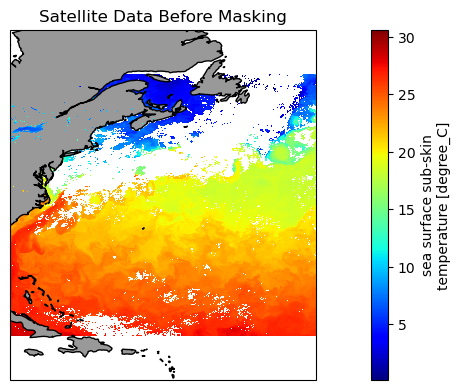

In [27]:
plt.figure(figsize=(14, 10))

# Label axes of a Plate Carree projection with a central longitude of 180:
ax1 = plt.subplot(211, projection=ccrs.PlateCarree(central_longitude=180))

# Use the lon and lat ranges to set the extent of the map
# the -85, --45 lon range will show the whole Pacific
# the 15, 55 lat range with capture the range of the data
ax1.set_extent([-80, -45, 15, 55], ccrs.PlateCarree())

# set the tick marks to be slightly inside the map extents

# add feature to the map
ax1.add_feature(cfeature.LAND, facecolor='0.6')
ax1.coastlines()

# format the lat and lon axis labels
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

ds_subset[0].plot.pcolormesh(ax=ax1, transform=ccrs.PlateCarree(), cmap='jet')

plt.title('Satellite Data Before Masking')
